In [3]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym

from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve


import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

import random as rd


## Punto 1

### 1.1) Solución analítica

Teniendo en cuenta la solución propuesta en el enunciado se asume que la condición inicial corresponde a $u(0) = 1$.

Se desea encontrar la solución analítica de 
$$\frac{du}{dt} = u^{p}, \ \ t \in [0,10]$$

Para esto se resuelve por casos. Suponga que $p = 1$, luego haciendo uso del métdo de separación de variables:

$$\frac{du}{u} = dt \implies \int \frac{du}{u} = c + \int dt.$$

Así, $\ln u = t + c \implies u(t) = ke^t$, donde $k \in \mathbb{R}$. Teniendo en cuenta la condición inicial se obtiene que $u(0) = 1 = k$. Por lo tanto, $u(t) = e^t$.

Suponiendo que $p < 1$ entonces:

$$\int\frac{du}{u^p} = c + \int dt \implies \frac{u^{1-p}}{1-p} = c + t.$$

Así, $u(t) = [(c+t)(1-p)]^{\frac{1}{1-p}}$. Tomando la condición inicial, $u(0) = 1 = [c(1-p)]^{\frac{1}{1-p}} \implies c = (1-p)^{-1}$. Concluyendo que $u(t) = [t(1-p) +1]^{\frac{1}{1-p}}$ 


<IPython.core.display.Javascript object>


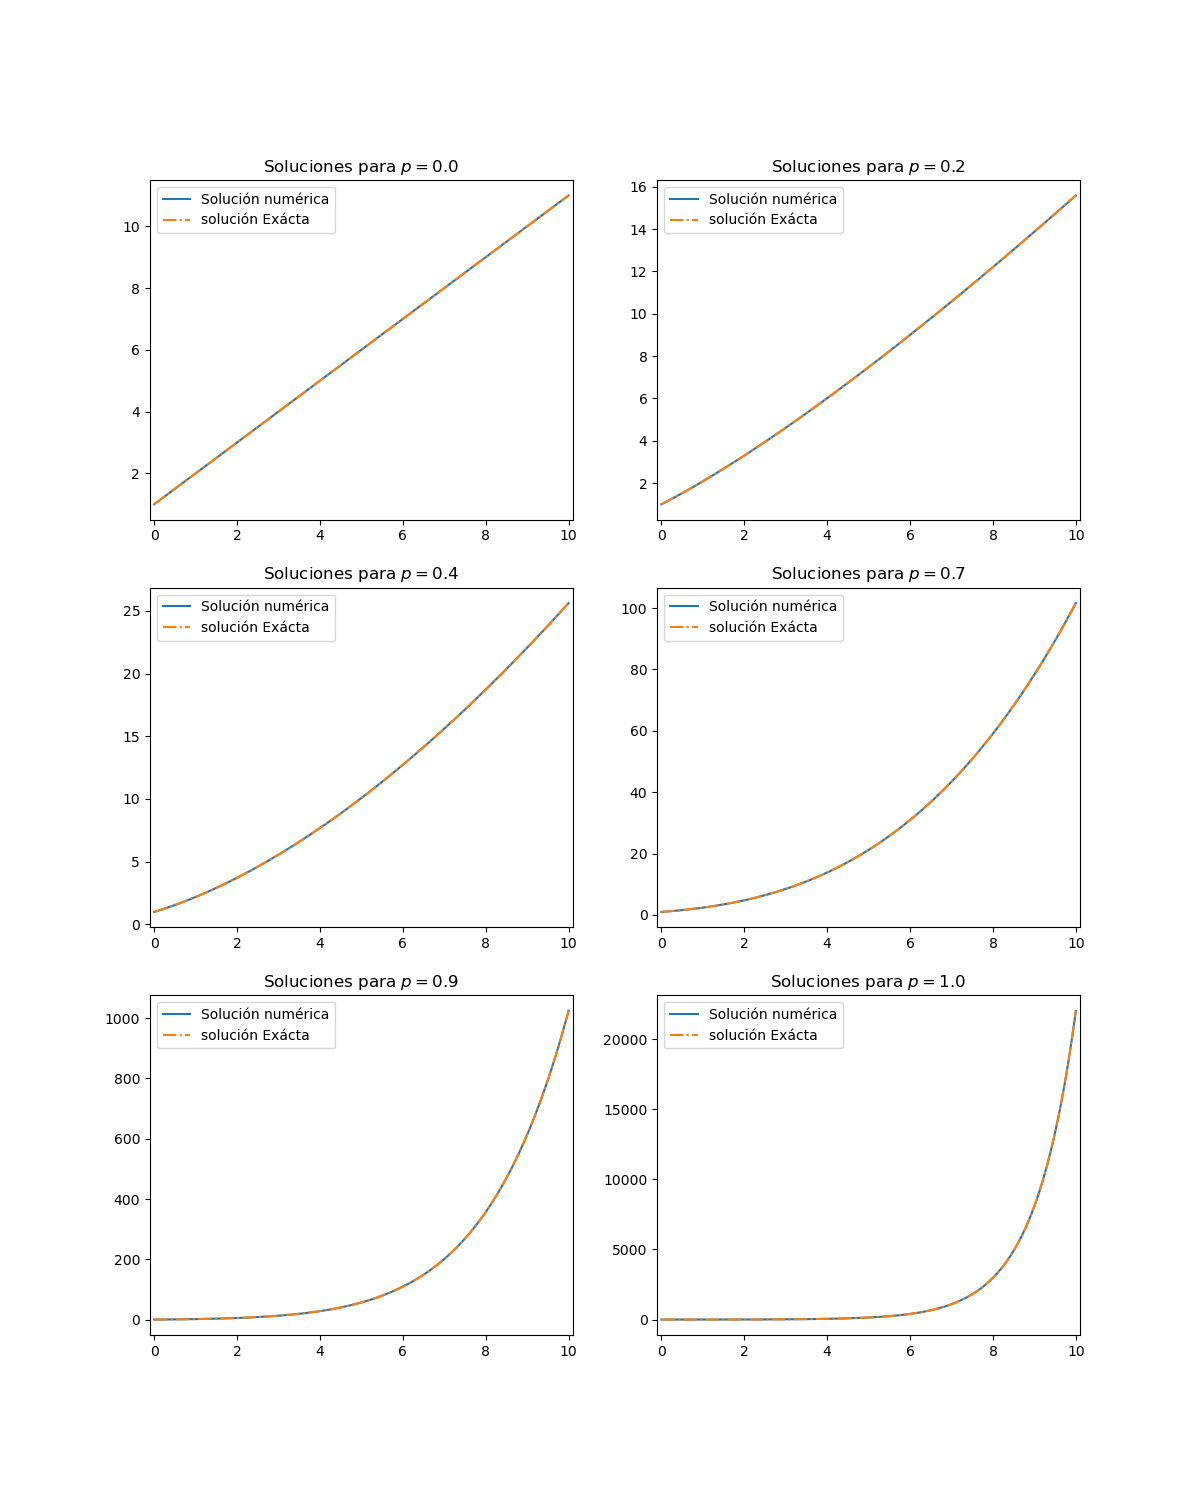

In [4]:
## 1.2) Solución numperica para p = [0., 0.2, 0.4, 0.7, 0.9, 1.].
## El problema se soluciona por medio de la función solve_ivp del paquete scipy.integrate

def System(t, r0, p = 1):
    u = r0[0]
    dudt = u**p
    
    return np.array([dudt])

def SolExacta(t, p = 1):
    if p != 1:
        return (t*(1-p) + 1)**(1/(1-p))
    return np.exp(t)


u0 = [1]
N = 100
t = np.linspace(0.,10,N+1)
valp = [0., 0.2, 0.4, 0.7, 0.9, 1.]

fig = plt.figure(figsize=(12,15))
for i in range(len(valp)):
    ax = fig.add_subplot(3,2,i+1)
    p = valp[i]
    sol = solve_ivp( System, (t[0],t[-1]), u0, t_eval = t, method = 'RK45', args=[p])
    unum = sol.y[0] #Solución numérica
    uexa = SolExacta(t, p)
    ax.plot(t, unum, label="Solución numérica", )
    ax.plot(t, uexa, label="solución Exácta", ls = "-.")
    ax.set_xlim(-0.1, 10.1)
    ax.set_title("Soluciones para $p = {}$".format(p))
    ax.legend()
    



In [5]:
#Punto 02
t = sym.Symbol('t',Real=True)
h = sym.Symbol('h',Real=True)

In [6]:
#Encuentre los coeficientes del m ́etodo de Adams-Bashforth de tres puntos.

F1 = (t-(-h)) * (t-(-2*h)) / (2*h**2)
F2 = -(t -(0)) * (t - (-2*h)) / (h**2)
F3 = (t - (-h)) * (t - (0)) / (2*h**2)

I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))

print(I1)
print(I2)
print(I3)

23*h/12
-4*h/3
5*h/12


In [7]:
#Encuentre los coeficientes del m ́etodo de Adams-Bashforth de cuatro puntos.


G1 = (t-(-h)) * (t-(-2*h)) * (t-(-3*h))/(6*h**3)
G2 = -(t-(0)) * (t-(-2*h)) * (t-(-3*h))/(2*h**3)
G3 = -(t-(0)) * (t-(-2*h)) * (t-(3*h))/(2*h**3)
G4 = (t-h) * (t-(2*h)) * (t-(3*h))/(6*h**3)

J1 = sym.integrate(G1, (t,0,h))
J2 = sym.integrate(G2, (t,0,h))
J3 = sym.integrate(G3, (t,0,h))
J4 = sym.integrate(G4, (t,0,h))

print(J1)
print(J2)
print(J3)
print(J4)

55*h/24
-59*h/24
37*h/24
-3*h/8


In [9]:
#Encuentre los coeficientes del m ́etodo de Adams-Moulton de tres puntos.

H1 = (t+h) * (t+0) / (2*h**2)
H2 = (t+(-h)) * (t+h) / (h**2)
H3 = (t+(-h)) * (t+0) / (2*h**2)

M1 = sym.integrate(H1, (t,0,h))
M2 = sym.integrate(H2, (t,0,h))
M3 = sym.integrate(H3, (t,0,h))

print(M1)
print(M2)
print(M3)

5*h/12
-2*h/3
-h/12


In [10]:
#Encuentre los coeficientes del m ́etodo de Adams-Moulton de cuatro puntos.

K1 = (t+(2*h)) * (t+0) * (t+h) / (6*h**3)
K2 = -(t+h) * (t+(2*h)) * (t+(-h)) / (2*h**3)
K3 = (t+(-h)) * (t+(2*h)) * (t-0) / (2*h**3)
K4 = -(t+(-h)) * (t+0) * (t+h) / (6*h**3)

N1 = sym.integrate(K1, (t,0,h))
N2 = sym.integrate(K2, (t,0,h))
N3 = sym.integrate(K3, (t,0,h))
N4 = sym.integrate(K4, (t,0,h))

print(N1)
print(N2)
print(N3)
print(N4)

3*h/8
19*h/24
-5*h/24
h/24


In [11]:
#Punto 3
# Definimos la clase particula
class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        self.epsilon = 0.1 #Parámetro de suavizado 
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros((len(t),len(v0)))

        
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))

        
        self.Ep = 0.
        self.Force = self.m * self.a
        self.G = 4*np.pi**2
        #self.G = 4*np.pi**2/365.2421**2
        
        # Initial condition
        
        # Esto significa en el pasado
        
        self.rp = r0
        self.vp = v0
        
           
        
    def Evolution(self,i):
        
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        self.SetAngularMomentum(i,self.r,self.m*self.v)
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2            
            self.v = ( self.rf - self.rp ) / (2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
        
  
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
        
    
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p):

        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2 + self.epsilon**2)**(3/2)
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / (d**2 + self.epsilon**2)**(1/2)
                
    
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector

    
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        #return -np.dot( self.m*self.a, self.r )
        return 0.5*self.Ep 
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
                
                
def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    G = 4*np.pi**2

    for i in range(NParticles):
        #Se va a generar un theta y un phi para luego obtener un punto sobre la esfera de 
        #radio 1 en coordenadas cartesianas
        theta, phi = rd.uniform(0.0,np.pi), rd.uniform(0.0, 2*np.pi)
        
        r0 = np.array([np.cos(phi)*np.sin(theta), np.sin(phi)*np.cos(theta), np.cos(theta)])
        v0 = np.array([0.,0.,0.]) 
        m = 0.01
        a0 = np.array([0.,0.,0.])
        p = Particle(r0,v0,a0,t,m,0.01,i)
        
        Particles_.append(p)
        
    return Particles_


def RunSimulation(t,NParticles = 10, Velo = 6):
    
    # Creating the particles
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
      
    for it in tqdm(range(len(t))):

        for i in range(len(Particles)):    
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
            
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
                
    return Particles

def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [12]:
Limits = np.array([2.,2.,2.]) 
dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)
Particles = RunSimulation(t,100)

100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [04:00<00:00,  8.33it/s]


In [15]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
MomentumAng = Particles[0].GetAngularMomentumVector()
MAMAG = np.zeros(len(MomentumAng))
                 
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector()) 
    MomentumAng = np.add(MomentumAng, Particles[i].GetAngularMomentumVector())
for j in range(len(MomentumAng)):    
    MAMAG[i] = np.linalg.norm(MomentumAng[i])

<IPython.core.display.Javascript object>


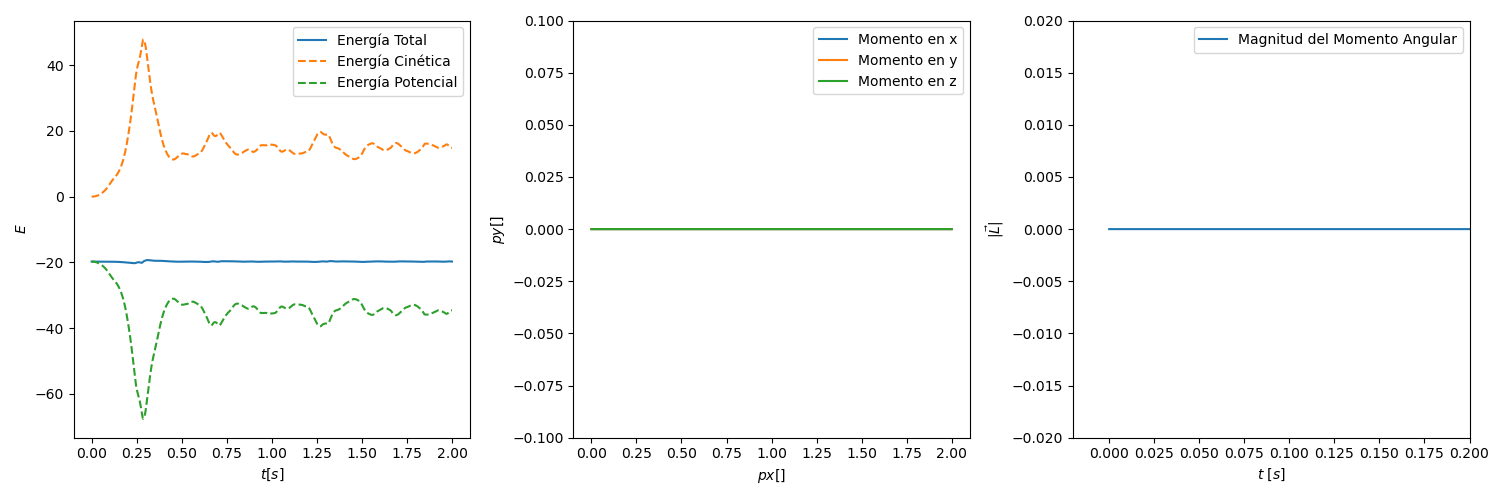

In [16]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,3,1)
ax2 = fig1.add_subplot(1,3,2)
ax3 = fig1.add_subplot(1,3,3)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
#ax1.set_yscale('log')
ax1.legend(loc=0)


ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$px[]$',fontsize=10)
ax2.set_ylabel(r'$py[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)


ax3.plot(t,MAMAG, label='Magnitud del Momento Angular')
ax3.set_xlabel(r'$t \ [s]$',fontsize=10)
ax3.set_ylabel(r'$|\vec{L}|$',fontsize=10)
ax3.set_ylim(-0.02,0.02)
ax3.set_xlim(-0.02,0.2)

ax3.legend(loc=0)

fig1.tight_layout()



plt.show()


<IPython.core.display.Javascript object>


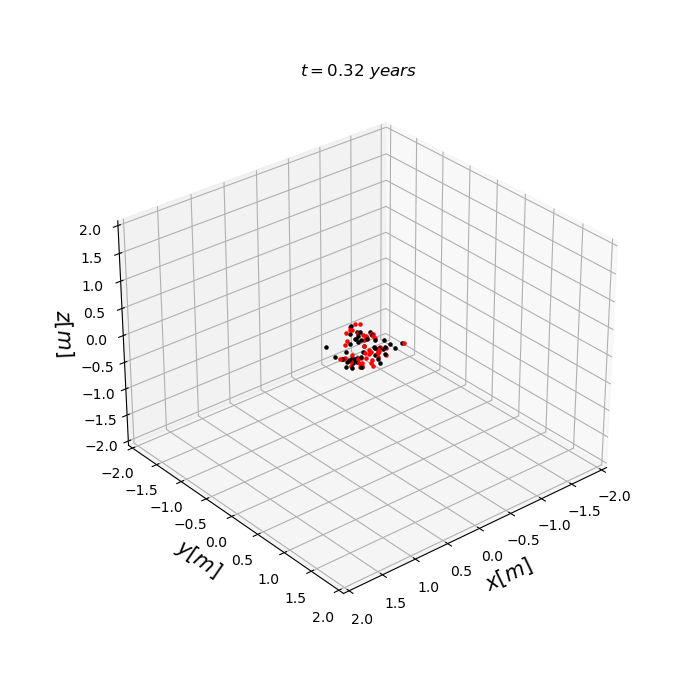

In [18]:
dt = 0.001
tmax = 2.
Limits = np.array([1.,1.,1.]) 

t = np.arange(0.,tmax+dt,dt)
redt = ReduceTime(t,10)

figPar = plt.figure(figsize=(7,7))
axPar = figPar.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    axPar.set_xlabel(r'$x[m]$',fontsize=15)
    axPar.set_ylabel(r'$y[m]$',fontsize=15)
    axPar.set_zlabel(r'$z[m]$',fontsize=15)
    axPar.set_xlim(-Limits[0]-1,Limits[0]+1)
    axPar.set_ylim(-Limits[1]-1,Limits[1]+1)
    axPar.set_zlim(-Limits[2]-1,Limits[2]+1)

def Update(i):
    
    plot = axPar.clear()
    init()
    
    j = 0
    colors = ["black", "red"]
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        
        plot = axPar.set_title(r'$t=%.2f \ years$' %(redt[i]))
        plot = axPar.scatter(x,y,z,marker='.', color = colors[j%2])
        j += 1
        
                 
    return plot
    
Animation = anim.FuncAnimation(figPar,Update,frames=len(redt),init_func=init)


In [19]:
#Punto 4
def acceleration(r,v):
    return -r

def Simplectic(CI,t0, tf, N, acc, order = 2):
    t = np.linspace(t0, tf, N)
    h = (t[-1]-t[0])/(N-1)
    r = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    
    #Se inicializan las condiciones iniciales
    r[0] = CI[0]
    v[0] = CI[1]
    a[0] = acc(r[0], v[0])
    
    
    #Definimos los coeficientes
    if order == 4:
        x1 = 1/((2-2**(1/3)))
        x0 = -(2**(1/3))/((2-2**(1/3)))
        xx = [x1, x0, x1]
    
    else:
        xx = [1]

    #Se aplica la relación de recurrencia del integrador
    for i in range(N-1):
        rj = r[i]
        vj = v[i]
        #De acuerdo a lo que inidicaba el paper, se tenía que para el operador 
        #Simpléctico de orden 4 S4(h) se debe aplicar tres veces el operador S2, simplectico de orden 2
        #3 veces segúidas con distintos coeficientes. Así, S4(h) = S2(x1*h)S2(x0*h)S2(x1*h), donde x1 y x0, son 
        # los coeficientes indicados anteriormente. Además, S2(h) = exp(0.5*h*B)exp(h*A)exp(0.5*h*B), donde A y B son
        # A = v cdot grad_r y B = a cdot grad_v . 
        
        #En cada iteración del siguiente del siguiente for 
        #transforma a r_n y v_n por medio del operador S2(xx[j]*h)
        
        for j in range(len(xx)):
            #Las variables con p indican el pasado
            rp = rj 
            vp = vj
            ap = acc(rj, vj)
            rj = (rp + (vp + xx[j]*ap*h/2)*xx[j]*h)   
            vj = vp + ap*h/2*xx[j] + acc(rj, vj)*xx[j]*h/2
    
        v[i+1] = vj
        r[i+1] = rj
        a[i+1] = acc(rj, vj)
    
    if( i == 0):
        r[i+1] = r[i] + v[i]*h
        v[i+1] = v[i] + a[i]*h
        a[i+1] = acc(r[i+1], v[i+1])
        
    U = 0.5*r**2
    K = 0.5*v**2
    return U, K, t #Se retornan las energías


<IPython.core.display.Javascript object>


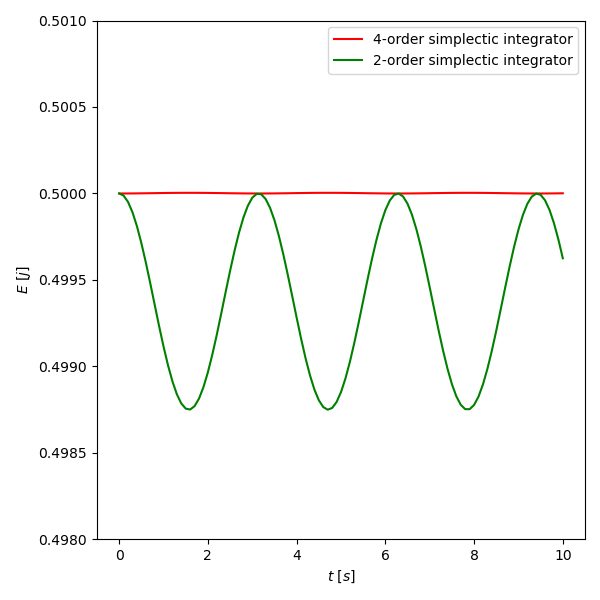

In [22]:
t0, tf = 0, 10
N = 101
r0 = [1,0]
U4, K4, t4 = Simplectic(r0, t0, tf, N, acceleration, order = 4)
U2, K2, t2 = Simplectic(r0, t0, tf, N, acceleration, order = 2)
    
E4 = U4 + K4
E2 = U2 + K2
plt.figure(figsize =(6,6))

plt.plot(t4,E4, color="red", label = "4-order simplectic integrator")
plt.plot(t2,E2, color="green", label = "2-order simplectic integrator")
plt.xlabel("$t \ [s]$")
plt.ylabel("$E \ [j]$")
plt.ylim(0.498, 0.501)
plt.legend()
plt.tight_layout()
#NOTAAAAAA: La gráfica obtenida a continuación es distinta a la mostrada en el enunciado.
#Sin embargo, considero que esta gráfica es correcta dado que en el tiempo t = 0, los valores
# de energía para cada método deben ser escencialmente los mismos, dado que tienen los mismos valores
#de posición y velocidadal ser estos las condiciones iniciales dadas. 